In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
net_df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/internet.csv')
net_df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
0,15,1,0,12,25,0,0
1,18,0,0,8,0,0,1
2,23,1,0,9,16,0,1
3,27,0,0,7,21,1,1
4,34,0,0,6,0,0,1


id: 고유 식별자 - 각 고객을 식별하기 위한 고유 번호입니다.

is_tv_subscriber: TV 서비스 가입 여부 - 고객이 TV 서비스를 구독 중인지 여부를 나타냅니다. 1은 구독 중, 0은 구독하지 않음을 의미합니다.

is_movie_package_subscriber: 영화 패키지 가입 여부 - 고객이 영화 패키지를 구독 중인지 여부를 나타냅니다. 1은 구독 중, 0은 구독하지 않음을 의미합니다.

subscription_age: 구독 기간 - 고객이 서비스에 가입한 기간(개월 수)을 의미합니다.

bill_avg: 평균 청구 금액 - 고객의 월 평균 청구 금액을 나타냅니다.

service_failure_count: 서비스 장애 횟수 - 고객이 경험한 서비스 장애(오류 또는 중단)의 횟수를 나타냅니다.

churn: 이탈 여부 - 고객의 이탈 여부를 나타내는 지표입니다. 1은 이탈한 고객, 0은 이탈하지 않은 고객을 의미합니다.

In [3]:
net_df.shape

(63383, 7)

In [4]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63383 entries, 0 to 63382
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           63383 non-null  int64
 1   is_tv_subscriber             63383 non-null  int64
 2   is_movie_package_subscriber  63383 non-null  int64
 3   subscription_age             63383 non-null  int64
 4   bill_avg                     63383 non-null  int64
 5   service_failure_count        63383 non-null  int64
 6   churn                        63383 non-null  int64
dtypes: int64(7)
memory usage: 3.4 MB


In [5]:
net_df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
count,6.338300e+04,63383.000000,63383.000000,63383.000000,63383.000000,63383.000000,63383.000000
mean,7.808240e+05,0.821309,0.338782,2.791758,19.469101,0.274727,0.565278
std,4.594616e+05,0.383097,0.473299,1.970525,13.232499,0.817178,0.495724
min,1.500000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.780955e+05,1.000000,0.000000,1.000000,14.000000,0.000000,0.000000
50%,7.834610e+05,1.000000,0.000000,2.000000,20.000000,0.000000,1.000000
75%,1.180696e+06,1.000000,1.000000,4.000000,23.000000,0.000000,1.000000
max,1.687085e+06,1.000000,1.000000,13.000000,406.000000,19.000000,1.000000


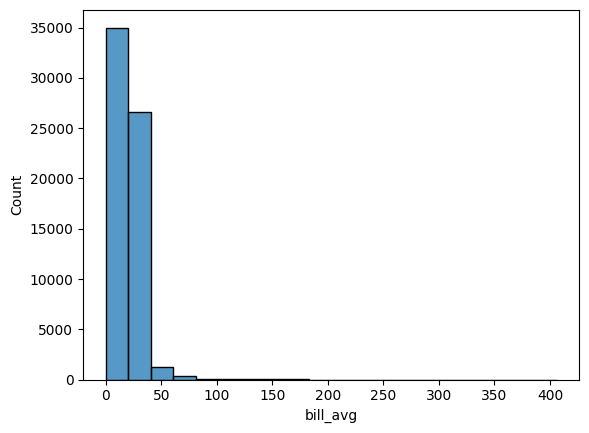

In [13]:
sns.histplot(net_df['bill_avg'], bins = 20)
plt.show()

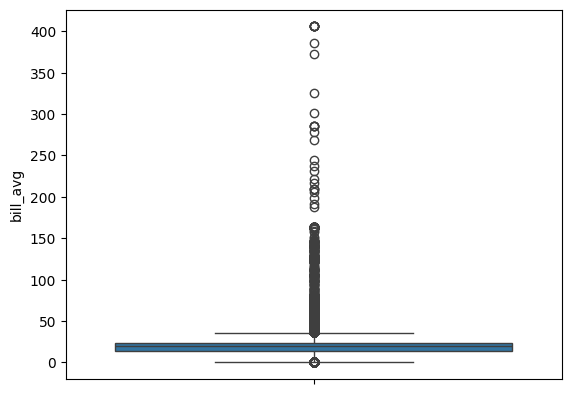

In [15]:
sns.boxplot(net_df['bill_avg'])
plt.show()

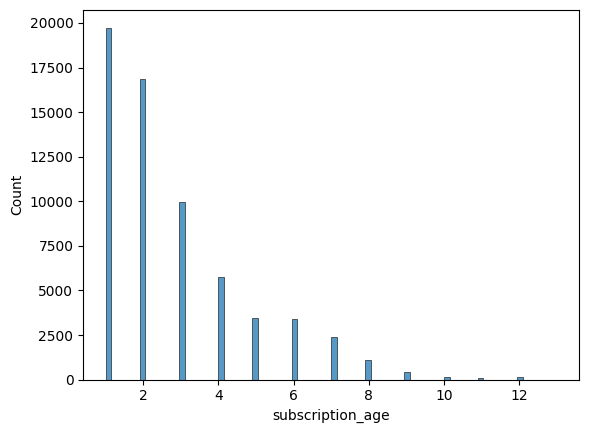

In [17]:
sns.histplot(net_df['subscription_age'])
plt.show()

In [18]:
net_df = net_df.set_index('id')

In [19]:
net_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
15,1,0,12,25,0,0
18,0,0,8,0,0,1
23,1,0,9,16,0,1
27,0,0,7,21,1,1
34,0,0,6,0,0,1


## 모델링


In [20]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4e718d51cb5c97fb2d54abd84536e4a2ca62720caf0737836b1990dc3708eb42
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [22]:
from lifelines import KaplanMeierFitter

In [23]:
kmf = KaplanMeierFitter()
kmf.fit(net_df['subscription_age'], event_observed=net_df['churn'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63383 total observations, 27554 right-censored observations>

In [24]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.821829
2.0,0.600818
3.0,0.478825
4.0,0.387347
5.0,0.325399
6.0,0.275443
7.0,0.232923
8.0,0.194374


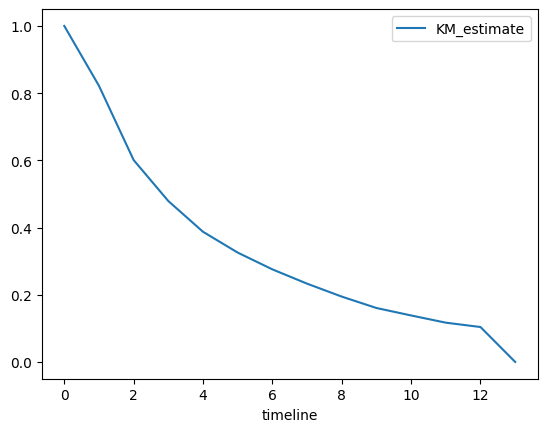

In [26]:
kmf.survival_function_.plot()
plt.show()

In [27]:
net_df['subscription_age'].value_counts()

,count
subscription_age,
1,19739
2,16847
3,9953
4,5764
5,3446
6,3378
7,2401
8,1081
9,420


In [29]:
net_df = net_df[net_df['subscription_age'] != 13]

In [30]:
kmf.fit(net_df['subscription_age'], event_observed=net_df['churn'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63380 total observations, 27554 right-censored observations>

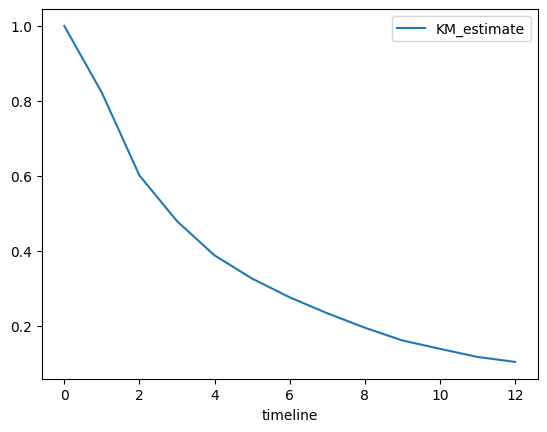

In [31]:
kmf.survival_function_.plot()
plt.show()

In [32]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,63380,63380
1.0,19739,11293,8446,0,63380
2.0,16847,11737,5110,0,43641
3.0,9953,5441,4512,0,26794
4.0,5764,3218,2546,0,16841
5.0,3446,1772,1674,0,11077
6.0,3378,1172,2206,0,7631
7.0,2401,657,1744,0,4253
8.0,1081,307,774,0,1852



*   removed: 해당 시간에 관측이 중단된(검열된) 데이터와 이벤트가 발생한 데이터를 합한 값입니다.
*   observed: 특정 시간에 사건(이벤트, 예: 사망, 고장 등)이 발생한 개수입니다.
*   censored: 해당 시간에 검열된 데이터의 개수입니다. 검열이란 데이터 수집이 끝날 때까지 사건이 발생하지 않았거나 데이터가 관찰되지 않은 경우를 의미합니다.
*   entrance: 해당 시간에 관측이 시작된 데이터의 개수입니다.
*   at_risk: 해당 시간 직전에 사건 발생의 리스크를 가지고 있는 데이터 개수입니다. 즉, 해당 시간에 살아남은(또는 관측이 지속된) 데이터 개수를 나타냅니다.




## CoxPH

In [33]:
from lifelines import CoxPHFitter

In [34]:
cph = CoxPHFitter()
cph.fit(net_df, duration_col='subscription_age', event_col='churn')

<lifelines.CoxPHFitter: fitted with 63380 total observations, 27554 right-censored observations>

In [35]:
cph.baseline_survival_

,baseline survival
1.0,0.854525
2.0,0.670724
3.0,0.553287
4.0,0.457593
5.0,0.388855
6.0,0.330978
7.0,0.280547
8.0,0.235377
9.0,0.196422
10.0,0.170723


In [37]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 63380 total observations, 27554 right-censored observations>
             duration col = 'subscription_age'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 63380
number of events observed = 35826
   partial log-likelihood = -364702.94
         time fit was run = 2024-11-14 16:59:19 UTC

---
                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                    
is_tv_subscriber            -0.65      0.52      0.01           -0.67           -0.62                0.51                0.54
is_movie_package_subscriber -0.76      0.47      0.01           -0.79           -0.74                0.45                0.48
bill_avg                    -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
service_failure_count        0.03      1.03      0.01            0.01            0.04                1.01                1.04

                             cmp to      z      p  -log2(p)
covariate                                                  
is_tv_subscriber               0.00 -52.55 <0.005       inf
is_movie_package_subscriber    0.00 -55.31 <0.005       inf
bill_avg                       0.00 -11.78 <0.005    104.01
service_failure_count          0.00   4.03 <0.005     14.11
---
Concordance = 0.65
Partial AIC = 729413.88
log-likelihood ratio test = 8926.45 on 4 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

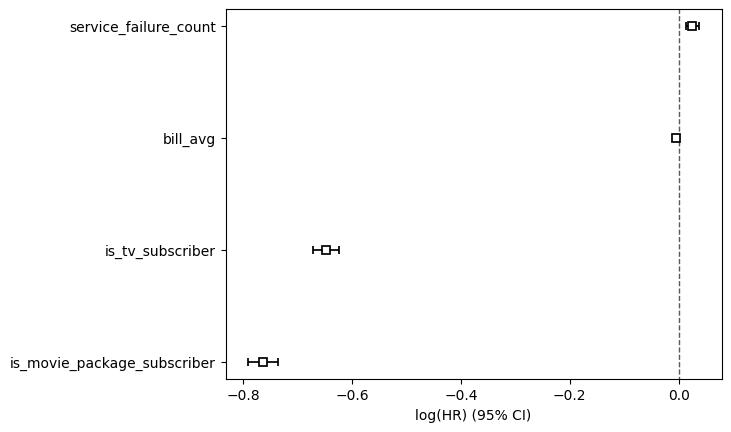

In [38]:
cph.plot()

<Axes: >

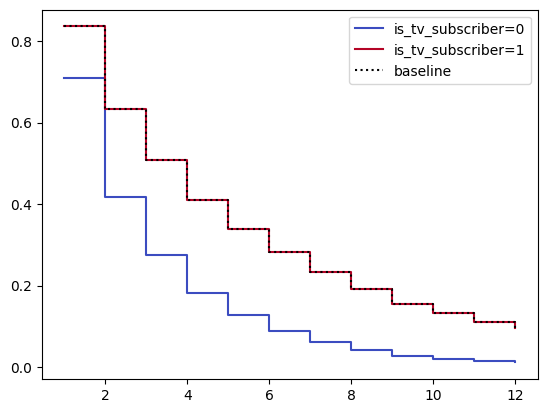

In [41]:
cph.plot_partial_effects_on_outcome(covariates='is_tv_subscriber', cmap='coolwarm', values=[0, 1])

<Axes: >

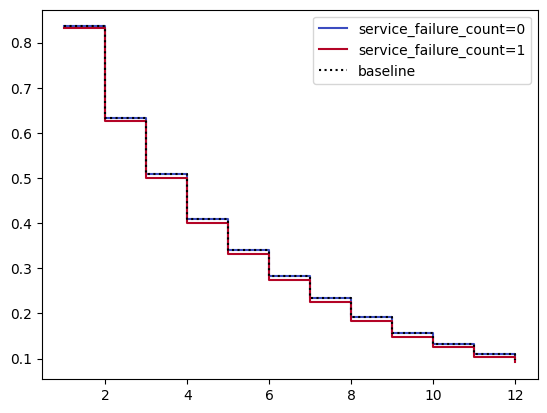

In [42]:
cph.plot_partial_effects_on_outcome(covariates='service_failure_count', cmap='coolwarm', values=[0, 1])

In [44]:
net_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,churn
id,,,,,,
15,1,0,12,25,0,0
18,0,0,8,0,0,1
23,1,0,9,16,0,1
27,0,0,7,21,1,1
34,0,0,6,0,0,1


In [43]:
cph.predict_survival_function(net_df)

,15,18,23,27,34,56,71,84,94,112,...,1685573,1685611,1685613,1685640,1685779,1685909,1686040,1686285,1686606,1687085
1.0,0.839447,0.683323,0.832438,0.704602,0.683323,0.924365,0.706971,0.695517,0.683323,0.683323,...,0.917671,0.827614,0.837141,0.706971,0.916015,0.833230,0.822790,0.924365,0.915720,0.834805
2.0,0.641065,0.380068,0.627554,0.410862,0.380068,0.818887,0.414380,0.397536,0.380068,0.380068,...,0.803904,0.618356,0.636599,0.414380,0.800225,0.629072,0.609240,0.818887,0.799570,0.632096
3.0,0.517420,0.238443,0.501341,0.267624,0.238443,0.743711,0.271027,0.254862,0.238443,0.238443,...,0.723635,0.490491,0.512087,0.271027,0.718733,0.503140,0.479813,0.743711,0.717861,0.506728
4.0,0.418825,0.150531,0.401721,0.175329,0.150531,0.676310,0.178280,0.164371,0.150531,0.150531,...,0.652301,0.390278,0.413134,0.178280,0.646471,0.403626,0.379095,0.676310,0.645436,0.407432
5.0,0.349411,0.101485,0.332245,0.122016,0.101485,0.623420,0.124501,0.112863,0.101485,0.101485,...,0.596781,0.320844,0.343682,0.124501,0.590341,0.334149,0.309770,0.623420,0.589200,0.337960
6.0,0.292027,0.068687,0.275304,0.085221,0.068687,0.575131,0.087256,0.077786,0.068687,0.068687,...,0.546469,0.264277,0.286430,0.087256,0.539573,0.277151,0.253631,0.575131,0.538351,0.280855
7.0,0.242940,0.046024,0.227018,0.058973,0.046024,0.529481,0.060595,0.053099,0.046024,0.046024,...,0.499263,0.216598,0.237596,0.060595,0.492028,0.228770,0.206598,0.529481,0.490748,0.232288
8.0,0.199813,0.030082,0.184977,0.039889,0.030082,0.484963,0.041140,0.035399,0.030082,0.030082,...,0.453589,0.175345,0.194818,0.041140,0.446115,0.186603,0.166162,0.484963,0.444794,0.189872
9.0,0.163362,0.019408,0.149781,0.026660,0.019408,0.442996,0.027603,0.023308,0.019408,0.019408,...,0.410885,0.141035,0.158775,0.027603,0.403276,0.151263,0.132752,0.442996,0.401933,0.154247
10.0,0.139753,0.013819,0.127179,0.019509,0.013819,0.412985,0.020260,0.016860,0.013819,0.013819,...,0.380575,0.119134,0.135495,0.020260,0.372926,0.128546,0.111554,0.412985,0.371577,0.131304
